In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split
import wrangle


In [2]:
z_df = wrangle.wrangle_zillow()

z_df.head()

/Users/jarad/codeup_data_science/regression_exercises/wrangle.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["area_code"] = df["fips"].astype(int)
/Users/jarad/codeup_data_science/regression_exercises/wrangle.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["year_built"] = df["yearbuilt"].astype(int)
/Users/jarad/codeup_data_science/regression_exercises/wrangle.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

,taxamount,area_code,year_built,beds,tax_value,sq_ft,baths
4,6941.39,6037,2005,4,296425,3633,2.0
6,10244.94,6037,2011,3,847770,1620,4.0
7,7924.68,6037,1926,3,646760,2077,2.0
11,91.60,6037,1972,0,5328,1200,0.0
14,255.17,6037,1973,0,6920,171,0.0


In [3]:
# split the data before fitting scalers 


z_train, z_test = train_test_split(z_df, train_size=0.8, random_state=123)
z_train, z_validate = train_test_split(z_train, train_size=0.7, random_state=123)


z_train.shape, z_validate.shape, z_test.shape

((1172966, 7), (502700, 7), (418917, 7))

In [4]:
z_train.head()

,taxamount,area_code,year_built,beds,tax_value,sq_ft,baths
421888,4418.72,6037,1961,3,357034,1550,2.0
548087,2798.18,6059,1996,3,287774,1800,3.5
714717,7210.51,6037,1923,3,588738,1542,2.0
749704,3622.02,6037,1952,3,290984,1128,1.0
539577,579.61,6037,1942,0,34541,396,1.0


In [62]:
cols_to_scale = ['beds','sq_ft', 'baths']

In [31]:
minmax = MinMaxScaler()

In [33]:
z_train_minmax = minmax.fit_transform(z_train[['year_built', 'beds','sq_ft', 'baths']])

In [39]:
standard = StandardScaler()

z_train_standard = standard.fit_transform(z_train[cols_to_scale])

In [41]:
robust = RobustScaler()

z_train_robust = robust.fit_transform(z_train[cols_to_scale])

Text(0.5, 1.0, 'quant Scale')

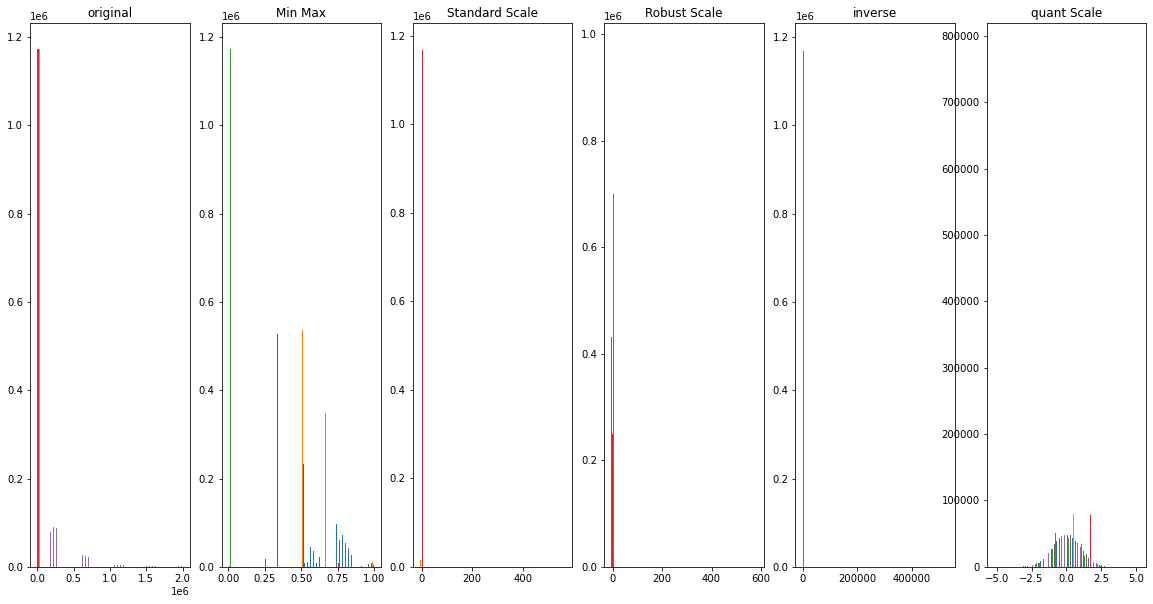

In [61]:
plt.figure(figsize=(20,10))
plt.subplot(161)
plt.hist(z_train, bins=50)
plt.title('original')
plt.subplot(162)
plt.hist(z_train_minmax, bins = 50)
plt.title('Min Max')
plt.subplot(163)
plt.hist(z_train_standard, bins = 100)
plt.title('Standard Scale')
plt.subplot(164)
plt.hist(z_train_robust, bins=100)
plt.title('Robust Scale')
plt.subplot(165)
plt.hist(z_train_inverse, bins=100)
plt.title('inverse')
plt.subplot(166)
plt.hist(z_train_quant, bins=100)
plt.title('quant Scale')

apply the inverse to standard

In [49]:
z_train_inverse = standard.inverse_transform(z_train_standard)

In [56]:
qaunt_scale = QuantileTransformer(output_distribution='normal')

In [57]:
z_train_quant = qaunt_scale.fit_transform(z_train)

In [ ]:
def MinMax_scaler(z_train, z_validate, z_test):

    scaler = MinMaxScaler().fit(z_train)
    z_train_scaled = pd.DataFrame(scaler.transform(z_train[cols_to_scale]), index=z_train.index)
    z_validate_scaled = pd.DataFrame(scaler.transform(z_validate[cols_to_scale]), index=z_validate.index)
    z_test_scaled = pd.DataFrame(scaler.transform(z_test[cols_to_scale]), index=z_test.index)
    
    return scaler, z_train_scaled, z_validate_scaled, z_test_scaled
    